In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
# 주소를 url에 넣는다.
url = "https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-Chicago/"
html_food = requests.get(url).text
soup_food = BeautifulSoup(html_food, 'lxml')
soup_food.title # 제대로 실행했는지 사이트 확인

<title>
  The 50 Best Sandwiches in Chicago |
  Chicago magazine
      |  November 2012
    </title>

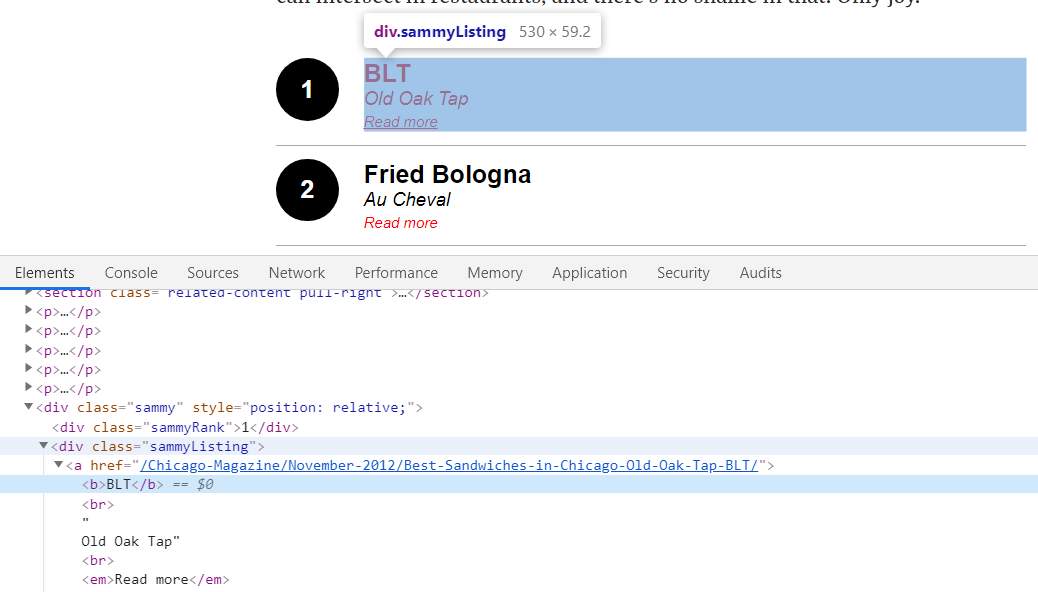

In [119]:
#일단 하나씩 해보자.
c = soup_food.find('div', 'sammyListing').text; c

'BLT\r\nOld Oak Tap\nRead more '

In [73]:
# 카페명부터 추출
c[c.find('\r\n') + 2:c.rfind('\n')]

'Old Oak Tap'

In [90]:
ad = str(ad)

In [3]:
# 랭킹
# 랭킹만 추출해 온다.
ranks = soup_food.find_all('div', 'sammyRank')
ranks = [rank.get_text() for rank in ranks]; ranks

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50']

In [5]:
# 메뉴명
labels = soup_food.find_all('div', 'sammyListing'); labels
# label = labels.find('b'); label
label = [label.find('b').text for label in labels]; label

['BLT',
 'Fried Bologna',
 'Woodland Mushroom',
 'Roast Beef',
 'PB&L',
 'Belgian Chicken Curry Salad',
 'Lobster Roll',
 'Smoked Salmon Salad',
 'Atomica Cemitas',
 'Grilled Laughing Bird Shrimp and Fried Po’ Boy',
 'Ham and Raclette Panino',
 'Breaded Steak',
 'The Hawkeye',
 'Chicken Dip',
 'Wild Boar Sloppy Joe',
 'Meatball Sub',
 'Corned Beef',
 'Turkey Club',
 'Falafel',
 'Crab Cake',
 'Chicken Schnitzel',
 'Shawarma',
 'Toasted Pimiento Cheese',
 'Vegetarian Panino',
 'Cali Chèvre',
 'Pastrami',
 'The Fredo',
 'Smoked Ham',
 'Jibarito',
 'Shaved Prime Rib',
 'Serrano Ham and Manchego Cheese',
 'Tuna Salad',
 'Paramount Reuben',
 'The Istanbul',
 'B.A.D.',
 'Duck Confit and Mozzarella',
 'Croque Monsieur',
 'Green Garbanzo',
 'The Hen House',
 'Tuscan Chicken',
 'The Marty ',
 'Whitefish',
 'Oat Bread, Pecan Butter, and Fruit Jam',
 'Cauliflower Melt',
 'Cubana',
 'Kufta',
 'Debbie’s Egg Salad',
 'Beef Curry',
 'Le Végétarien',
 'The Gatsby']

In [199]:
# 카페명
names = soup_food.find_all('div', 'sammyListing')
names[0]
names = [name.text for name in names]
name = [(name[name.find('\r\n') + 2 : name.rfind('\n')])
        for name in names]; name

['Old Oak Tap',
 'Au Cheval',
 'Xoco',
 'Al’s Deli',
 'Publican Quality Meats',
 'Hendrickx Belgian Bread Crafter',
 'Acadia',
 'Birchwood Kitchen',
 'Cemitas Puebla',
 'Nana',
 'Lula Cafe',
 'Ricobene’s',
 'Frog n Snail',
 'Crosby’s Kitchen',
 'Longman & Eagle',
 'Bari',
 'Manny’s',
 'Eggy’s',
 'Old Jerusalem',
 'Mindy’s HotChocolate',
 'Olga’s Delicatessen',
 'Dawali Mediterranean Kitchen',
 'Big Jones',
 'La Pane',
 'Pastoral',
 'Max’s Deli',
 'Lucky’s Sandwich Co.',
 'City Provisions',
 'Papa’s Cache Sabroso',
 'Bavette’s Bar & Boeuf',
 'Hannah’s Bretzel',
 'La Fournette',
 'Paramount Room',
 'Melt Sandwich Shoppe',
 'Floriole Cafe & Bakery',
 'First Slice Pie Café',
 'Troquet',
 'Grahamwich',
 'Saigon Sisters',
 'Rosalia’s Deli',
 'Z&H MarketCafe',
 'Market House on the Square',
 'Elaine’s Coffee Call',
 'Marion Street Cheese Market',
 'Cafecito',
 'Chickpea',
 'The Goddess and Grocer',
 'Zenwich',
 'Toni Patisserie',
 'Phoebe’s Bakery']

In [21]:
# 링크명 구해주기
links = soup_food.find_all('div', 'sammyListing')

links = [str(link) for link in links]
ht = "https://www.chicagomag.com"
dummy = []
# 링크 안에 주소값이 없으면 주소값 붙여주고, 있으면 빠진 https만 적어줌
for link in links:
    if not "www.chicagomag.com" in link:
        dummy.append(ht + link[link.find('/') : link.rfind('/">')])
    else:
        dummy.append("https:" + link[link.find('/') : link.rfind('/">')])
                                   
dummy

['https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT',
 'https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna',
 'https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom',
 'https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Als-Deli-Roast-Beef',
 'https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Publican-Quality-Meats-PB-L',
 'https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Hendrickx-Belgian-Bread-Crafter-Belgian-Chicken-Curry-Salad',
 'https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Acadia-Lobster-Roll',
 'https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Birchwood-Kitchen-Smoked-Salmon-Salad',
 'https://www.chicagomag.com/Chicago-Magazine/November-2012

In [22]:
# 과제2 : 상세페이지 정보 크롤링 - 가격, 주소, 전화번호, 홈페이지정보
# dummy가 모든 주소값임, 일단 하나만 먼저 가져올 수 있는지 확인해 보자.
url = dummy[0]
html_food2 = requests.get(url).text
soup_food2 = BeautifulSoup(html_food2, 'lxml')
soup_food2.title

<title>
  1. Old Oak Tap BLT |
  Chicago magazine
      |  November 2012
    </title>

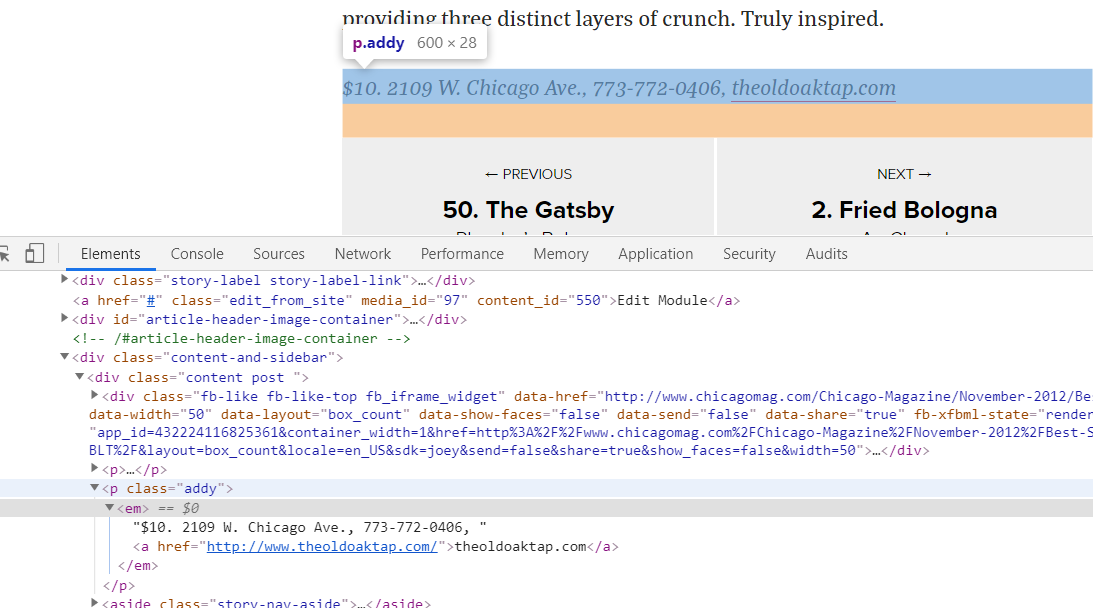

In [57]:
# 여기서 
soup_food2.select('.addy em')[0]

'$6.85. 3351 N. Broadway, 773-868-4000, phoebesbakery.com'

In [51]:
urllist = []
for url in dummy:
    html_food2 = requests.get(url).text
    soup_food2 = BeautifulSoup(html_food2, 'lxml')
    urllist.append(soup_food2.select('.addy em'))
    
urllist

[[<em>$10. 2109 W. Chicago Ave., 773-772-0406, <a href="http://www.theoldoaktap.com/">theoldoaktap.com</a></em>],
 [<em>$9. 800 W. Randolph St., 312-929-4580, <a href="http://aucheval.tumblr.com/">aucheval.tumblr.com</a></em>],
 [<em>$9.50. 445 N. Clark St., 312-334-3688, <a href="http://www.rickbayless.com/">rickbayless.com</a></em>],
 [<em>$9.40. 914 Noyes St., Evanston, 847-475-9400, <a href="http://alsdeli.net/">alsdeli.net</a></em>],
 [<em>$10. 825 W. Fulton Mkt., 312-445-8977, <a href="http://publicanqualitymeats.com/">publicanqualitymeats.com</a></em>],
 [<em>$7.25. 100 E. Walton St., 312-649-6717</em>],
 [<em>$16. 1639 S. Wabash Ave., 312-360-9500, <a href="http://acadiachicago.com/">acadiachicago.com</a></em>],
 [<em>$10. 2211 W. North Ave., 773-276-2100, <a href="http://www.birchwoodkitchen.com/">birchwoodkitchen.com</a></em>],
 [<em>$9. 3619 W. North Ave., 773-772-8435, <a href="http://cemitaspuebla.com/">cemitaspuebla.com</a></em>],
 [<em>$17. 3267 S. Halsted St., 312-929-2

In [80]:
# 한 꺼풀 벗기기
urllist = sum(urllist, [])

In [84]:
type(urllist[0])

bs4.element.Tag

In [86]:
# 1차원 리스트 안에 넣어놓기
urllist = [i.text for i in urllist]; urllist

['$10. 2109 W. Chicago Ave., 773-772-0406, theoldoaktap.com',
 '$9. 800 W. Randolph St., 312-929-4580, aucheval.tumblr.com',
 '$9.50. 445 N. Clark St., 312-334-3688, rickbayless.com',
 '$9.40. 914 Noyes St., Evanston, 847-475-9400, alsdeli.net',
 '$10. 825 W. Fulton Mkt., 312-445-8977, publicanqualitymeats.com',
 '$7.25. 100 E. Walton St., 312-649-6717',
 '$16. 1639 S. Wabash Ave., 312-360-9500, acadiachicago.com',
 '$10. 2211 W. North Ave., 773-276-2100, birchwoodkitchen.com',
 '$9. 3619 W. North Ave., 773-772-8435, cemitaspuebla.com',
 '$17. 3267 S. Halsted St., 312-929-2486, nanaorganic.com',
 '$11. 2537 N. Kedzie Blvd., 773-489-9554, lulacafe.com',
 '$5.49. Multiple locations, ricobenespizza.com',
 '$14. 3124 N. Broadway, 773-661-9166, frognsnail.com',
 '$10. 3455 N. Southport Ave., 773-883-2525, crosbyskitchenchicago.com',
 '$13. 2657 N. Kedzie Ave., 773-276-7110, longmanandeagle.com',
 '$4.50. 1120 W. Grand Ave., 312-666-0730, bariitaliansubs.com',
 '$11.95. 1141 S. Jefferson St.

In [198]:
# 돈만 가져오자.
dollar = [i.split('. ')[0] for i in urllist]; dollar

['$10',
 '$9',
 '$9.50',
 '$9.40',
 '$10',
 '$7.25',
 '$16',
 '$10',
 '$9',
 '$17',
 '$11',
 '$5.49',
 '$14',
 '$10',
 '$13',
 '$4.50',
 '$11.95',
 '$11.50',
 '$6.25',
 '$15',
 '$5',
 '$6',
 '$8',
 '$5.99',
 '$7.52',
 '$11.95',
 '$7.50',
 '$12.95',
 '$7',
 '$21',
 '$9.79',
 '$9.75',
 '$13',
 '$7.95',
 '$9',
 '$9',
 '$8',
 '$8',
 '$7',
 '$6',
 '$7.25',
 '$11',
 '$6',
 '$9',
 '$5.49',
 '$8',
 '$6.50',
 '$7.50',
 '$8.75',
 '$6.85']

In [175]:
# 웹 주소 추출
web = [i[-1] for i in spl]
web1 = [i.split(',')[-1] for i in web]; web1

[' theoldoaktap.com',
 ' aucheval.tumblr.com',
 ' rickbayless.com',
 ' alsdeli.net',
 ' publicanqualitymeats.com',
 ' 312-649-6717',
 ' acadiachicago.com',
 ' birchwoodkitchen.com',
 ' cemitaspuebla.com',
 ' nanaorganic.com',
 ' lulacafe.com',
 ' ricobenespizza.com',
 ' frognsnail.com',
 ' crosbyskitchenchicago.com',
 ' longmanandeagle.com',
 ' bariitaliansubs.com',
 ' mannysdeli.com',
 ' eggysdiner.com',
 ' oldjerusalemchicago.com',
 ' hotchocolatechicago.com',
 ' 773-539-8038',
 ' dawalikitchen.com',
 ' bigjoneschicago.com',
 ' lapanechicago.com',
 ' pastoralartisan.com',
 ' maxs-deli.com',
 ' luckysandwich.com',
 ' cityprovisions.com',
 ' papascachesabroso.com',
 ' 312-624-8154',
 ' hannahsbretzel.com',
 ' lafournette.com',
 ' paramountroom.com',
 ' meltsandwichshoppechicago.com',
 ' floriole.com',
 ' firstslice.org',
 ' troquetchicago.com',
 ' grahamwich.com',
 ' saigonsisters.com',
 ' rosaliasdeli.com',
 ' zhmarketcafe.com',
 ' themarkethouse.com',
 ' jdvhotels.com/hotels/chicago/

In [180]:
# 웹 주소에 -이 포함되어 있으면 그 줄은 None값 처리(전화번호를 가져온 거임)
website = [i if '-' not in i else None for i in web1]; website

[' theoldoaktap.com',
 ' aucheval.tumblr.com',
 ' rickbayless.com',
 ' alsdeli.net',
 ' publicanqualitymeats.com',
 None,
 ' acadiachicago.com',
 ' birchwoodkitchen.com',
 ' cemitaspuebla.com',
 ' nanaorganic.com',
 ' lulacafe.com',
 ' ricobenespizza.com',
 ' frognsnail.com',
 ' crosbyskitchenchicago.com',
 ' longmanandeagle.com',
 ' bariitaliansubs.com',
 ' mannysdeli.com',
 ' eggysdiner.com',
 ' oldjerusalemchicago.com',
 ' hotchocolatechicago.com',
 None,
 ' dawalikitchen.com',
 ' bigjoneschicago.com',
 ' lapanechicago.com',
 ' pastoralartisan.com',
 None,
 ' luckysandwich.com',
 ' cityprovisions.com',
 ' papascachesabroso.com',
 None,
 ' hannahsbretzel.com',
 ' lafournette.com',
 ' paramountroom.com',
 ' meltsandwichshoppechicago.com',
 ' floriole.com',
 ' firstslice.org',
 ' troquetchicago.com',
 ' grahamwich.com',
 ' saigonsisters.com',
 ' rosaliasdeli.com',
 ' zhmarketcafe.com',
 ' themarkethouse.com',
 ' jdvhotels.com/hotels/chicago/lincoln',
 ' marionstreetcheesemarket.com',
 

In [187]:
# 전화번호를 찾자
call = []
for i in urllist:
    if '-' in i:
        call.append(i[i.find('-') - 3: i.find('-')+9])
    else:
        call.append(None)
call

['773-772-0406',
 '312-929-4580',
 '312-334-3688',
 '847-475-9400',
 '312-445-8977',
 '312-649-6717',
 '312-360-9500',
 '773-276-2100',
 '773-772-8435',
 '312-929-2486',
 '773-489-9554',
 None,
 '773-661-9166',
 '773-883-2525',
 '773-276-7110',
 '312-666-0730',
 '312-939-2855',
 '773-234-3449',
 '312-944-0459',
 '773-489-1747',
 '773-539-8038',
 None,
 '773-275-5725',
 '773-539-5321',
 None,
 '847-831-0600',
 None,
 '773-293-2489',
 '773-862-8313',
 '312-624-8154',
 None,
 '312-624-9430',
 '312-829-6300',
 '773-681-9914',
 '773-883-1313',
 '773-275-4297',
 '773-334-5664',
 '312-265-0434',
 None,
 '630-516-3354',
 '773-538-7372',
 '847-234-8800',
 '312-254-4665',
 '708-725-7200',
 '312-922-2233',
 '773-384-9930',
 '312-896-2600',
 '630-359-5234',
 '312-726-2020',
 '773-868-4000']

In [195]:
# 주소를 찾자
address = []
#주소는 '. '부터 첫 하이푼 다섯번째 전에 있다. 전화번호가 없다면 첫 쉼표전까지 있음
for i in urllist:
    if '-' in i:
        address.append(i[i.find('. ') +1 : i.find('-') - 5])
    else:
        address.append(i[i.find('. ') +1 : i.find(',') - 1])
address

[' 2109 W. Chicago Ave.',
 ' 800 W. Randolph St.',
 ' 445 N. Clark St.',
 ' 914 Noyes St., Evanston',
 ' 825 W. Fulton Mkt.',
 ' 100 E. Walton St.',
 ' 1639 S. Wabash Ave.',
 ' 2211 W. North Ave.',
 ' 3619 W. North Ave.',
 ' 3267 S. Halsted St.',
 ' 2537 N. Kedzie Blvd.',
 ' Multiple location',
 ' 3124 N. Broadway',
 ' 3455 N. Southport Ave.',
 ' 2657 N. Kedzie Ave.',
 ' 1120 W. Grand Ave.',
 ' 1141 S. Jefferson St.',
 ' 333 E. Benton Pl.',
 ' 1411 N. Wells St.',
 ' 1747 N. Damen Ave.',
 ' 3209 W. Irving Park Rd.',
 ' Multiple location',
 ' 5347 N. Clark St.',
 ' 2954 W. Irving Park Rd.',
 ' Multiple location',
 ' 191 Skokie Valley Rd., Highland Park',
 ' Multiple location',
 ' 1818 W. Wilson Ave.',
 ' 2517 W. Division St.',
 ' 218 W. Kinzie St.',
 ' Multiple location',
 ' 1547 N. Wells St.',
 ' 415 N. Milwaukee Ave.',
 ' 1840 N. Damen Ave.',
 ' 1220 W. Webster Ave.',
 ' 5357 N. Ashland Ave.',
 ' 1834 W. Montrose Ave.',
 ' 615 N. State St.',
 ' Multiple location',
 ' 241 N. York Rd., E

In [209]:
import pandas as pd
data = {'랭킹': ranks,
            '카페명': name,
            '메뉴명': label,
           '상세페이지 링커': dummy,
           '가격': dollar,
           '주소': address,
           '전화번호': call,
           '홈페이지 정보': website}
sub1 = pd.DataFrame(data); sub1

,랭킹,카페명,메뉴명,상세페이지 링커,가격,주소,전화번호,홈페이지 정보
0,1,Old Oak Tap,BLT,https://www.chicagomag.com/Chicago-Magazine/No...,$10,2109 W. Chicago Ave.,773-772-0406,theoldoaktap.com
1,2,Au Cheval,Fried Bologna,https://www.chicagomag.com/Chicago-Magazine/No...,$9,800 W. Randolph St.,312-929-4580,aucheval.tumblr.com
2,3,Xoco,Woodland Mushroom,https://www.chicagomag.com/Chicago-Magazine/No...,$9.50,445 N. Clark St.,312-334-3688,rickbayless.com
3,4,Al’s Deli,Roast Beef,https://www.chicagomag.com/Chicago-Magazine/No...,$9.40,"914 Noyes St., Evanston",847-475-9400,alsdeli.net
4,5,Publican Quality Meats,PB&L,https://www.chicagomag.com/Chicago-Magazine/No...,$10,825 W. Fulton Mkt.,312-445-8977,publicanqualitymeats.com
5,6,Hendrickx Belgian Bread Crafter,Belgian Chicken Curry Salad,https://www.chicagomag.com/Chicago-Magazine/No...,$7.25,100 E. Walton St.,312-649-6717,None
6,7,Acadia,Lobster Roll,https://www.chicagomag.com/Chicago-Magazine/No...,$16,1639 S. Wabash Ave.,312-360-9500,acadiachicago.com
7,8,Birchwood Kitchen,Smoked Salmon Salad,https://www.chicagomag.com/Chicago-Magazine/No...,$10,2211 W. North Ave.,773-276-2100,birchwoodkitchen.com
8,9,Cemitas Puebla,Atomica Cemitas,https://www.chicagomag.com/Chicago-Magazine/No...,$9,3619 W. North Ave.,773-772-8435,cemitaspuebla.com
9,10,Nana,Grilled Laughing Bird Shrimp and Fried Po’ Boy,https://www.chicagomag.com/Chicago-Magazine/No...,$17,3267 S. Halsted St.,312-929-2486,nanaorganic.com


In [210]:
sub1.set_index('랭킹', inplace = True)
sub1

,카페명,메뉴명,상세페이지 링커,가격,주소,전화번호,홈페이지 정보
랭킹,,,,,,,
1,Old Oak Tap,BLT,https://www.chicagomag.com/Chicago-Magazine/No...,$10,2109 W. Chicago Ave.,773-772-0406,theoldoaktap.com
2,Au Cheval,Fried Bologna,https://www.chicagomag.com/Chicago-Magazine/No...,$9,800 W. Randolph St.,312-929-4580,aucheval.tumblr.com
3,Xoco,Woodland Mushroom,https://www.chicagomag.com/Chicago-Magazine/No...,$9.50,445 N. Clark St.,312-334-3688,rickbayless.com
4,Al’s Deli,Roast Beef,https://www.chicagomag.com/Chicago-Magazine/No...,$9.40,"914 Noyes St., Evanston",847-475-9400,alsdeli.net
5,Publican Quality Meats,PB&L,https://www.chicagomag.com/Chicago-Magazine/No...,$10,825 W. Fulton Mkt.,312-445-8977,publicanqualitymeats.com
6,Hendrickx Belgian Bread Crafter,Belgian Chicken Curry Salad,https://www.chicagomag.com/Chicago-Magazine/No...,$7.25,100 E. Walton St.,312-649-6717,None
7,Acadia,Lobster Roll,https://www.chicagomag.com/Chicago-Magazine/No...,$16,1639 S. Wabash Ave.,312-360-9500,acadiachicago.com
8,Birchwood Kitchen,Smoked Salmon Salad,https://www.chicagomag.com/Chicago-Magazine/No...,$10,2211 W. North Ave.,773-276-2100,birchwoodkitchen.com
9,Cemitas Puebla,Atomica Cemitas,https://www.chicagomag.com/Chicago-Magazine/No...,$9,3619 W. North Ave.,773-772-8435,cemitaspuebla.com
